In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from UNET import UNET
from data_loading import lungCT_segmentation_DATA
from model_tools import iou_compute, DiceLoss
from torch.utils.data import DataLoader
from tqdm import tqdm

In [2]:
device = torch.device("cpu")

In [3]:
batch_size = 1
test_npy = np.load('D:/DATA/VESSEL_DATA/middle_lung.npy')
test = lungCT_segmentation_DATA(test_npy, 'test')
test_loader = DataLoader(test, batch_size = batch_size, shuffle = True)

100%|██████████| 158/158 [00:00<?, ?it/s]


In [4]:
# UNET Trained with BCE Loss
path_bce = 'C:/Users/rrsoo/AdvancedStuff/Medical_AI/VESSEL12/Segmentation/Saved Models/UNET_0.973_BCE_08-13-20/UNET_0.973_BCE08-13-20.pth'
path_dice = 'C:/Users/rrsoo/AdvancedStuff/Medical_AI/VESSEL12/Segmentation/Saved Models/UNET_0.981_Dice_08-12-20/UNET_0.981_08-12-20.pth'
path_mse = 'C:/Users/rrsoo/AdvancedStuff/Medical_AI/VESSEL12/Segmentation/Saved Models/UNET_0.980_MSE_08-13-20/UNET_0.980_MSE_08-13-20.pth'

In [5]:
unet_bce = UNET(1, 1).to(device)
unet_dice = UNET(1, 1).to(device)
unet_mse = UNET(1, 1).to(device)
unet_bce.load_state_dict(torch.load(path_bce))
unet_dice.load_state_dict(torch.load(path_dice))
unet_mse.load_state_dict(torch.load(path_mse))

<All keys matched successfully>

In [6]:
def test(model, test_loader, batch_size, criterion):
    model.eval()
    loss_total = 0
    iou_total = 0
    for batch in tqdm(test_loader):
        img_batch, mask_batch = batch[0].to(device), batch[1].to(device)
        output = model(img_batch)
        loss = criterion(output, mask_batch)
        loss_total += loss.item()
        iou = iou_compute(mask_batch, output)
        iou_total += iou
    
    loss_total /= len(test_loader)
    iou_total /= (batch_size * len(test_loader))
    
    return loss_total, iou_total

In [7]:
'''
### Upload to Cloud ###
test_loss_bce, test_iou_bce = test(unet_bce, test_loader, batch_size, nn.BCELoss())
test_loss_dice, test_iou_dice = test(unet_dice, test_loader, batch_size, DiceLoss())
test_loss_mse, test_iou_mse = test(unet_mse, test_loader, batch_size, nn.MSELoss())

print("BCE Model Test Loss: %s\nBCE Model Test IOU: %s\nDice Model Test Loss: %s\nDice Model Test IOU: %s\nMSE Model Test Loss: %s\nMSE Model Test IOU: %s\n" 
      % (test_loss_bce, test_iou_bce, test_loss_dice, test_iou_dice, test_loss_mse, test_iou_mse))
'''


'\n### Upload to Cloud ###\ntest_loss_bce, test_iou_bce = test(unet_bce, test_loader, batch_size, nn.BCELoss())\ntest_loss_dice, test_iou_dice = test(unet_dice, test_loader, batch_size, DiceLoss())\ntest_loss_mse, test_iou_mse = test(unet_mse, test_loader, batch_size, nn.MSELoss())\n\nprint("BCE Model Test Loss: %s\nBCE Model Test IOU: %s\nDice Model Test Loss: %s\nDice Model Test IOU: %s\nMSE Model Test Loss: %s\nMSE Model Test IOU: %s\n" \n      % (test_loss_bce, test_iou_bce, test_loss_dice, test_iou_dice, test_loss_mse, test_iou_mse))\n'

In [8]:
bce_train_loss = np.load('C:/Users/rrsoo/AdvancedStuff/Medical_AI/VESSEL12/Segmentation/Saved Models/UNET_0.973_BCE_08-13-20/train_losses.npy')
bce_train_iou = np.load('C:/Users/rrsoo/AdvancedStuff/Medical_AI/VESSEL12/Segmentation/Saved Models/UNET_0.973_BCE_08-13-20/train_ious.npy')
dice_train_loss = np.load('C:/Users/rrsoo/AdvancedStuff/Medical_AI/VESSEL12/Segmentation/Saved Models/UNET_0.981_Dice_08-12-20/train_losses.npy')
dice_train_iou = np.load('C:/Users/rrsoo/AdvancedStuff/Medical_AI/VESSEL12/Segmentation/Saved Models/UNET_0.981_Dice_08-12-20/train_ious.npy')
mse_train_loss = np.load('C:/Users/rrsoo/AdvancedStuff/Medical_AI/VESSEL12/Segmentation/Saved Models/UNET_0.980_MSE_08-13-20/train_losses.npy')
mse_train_iou = np.load('C:/Users/rrsoo/AdvancedStuff/Medical_AI/VESSEL12/Segmentation/Saved Models/UNET_0.980_MSE_08-13-20/train_ious.npy')

In [9]:
bce_val_loss = np.load('C:/Users/rrsoo/AdvancedStuff/Medical_AI/VESSEL12/Segmentation/Saved Models/UNET_0.973_BCE_08-13-20/val_losses.npy')
bce_val_iou = np.load('C:/Users/rrsoo/AdvancedStuff/Medical_AI/VESSEL12/Segmentation/Saved Models/UNET_0.973_BCE_08-13-20/val_ious.npy')
dice_val_loss = np.load('C:/Users/rrsoo/AdvancedStuff/Medical_AI/VESSEL12/Segmentation/Saved Models/UNET_0.981_Dice_08-12-20/val_losses.npy')
dice_val_iou = np.load('C:/Users/rrsoo/AdvancedStuff/Medical_AI/VESSEL12/Segmentation/Saved Models/UNET_0.981_Dice_08-12-20/val_ious.npy')
mse_val_loss = np.load('C:/Users/rrsoo/AdvancedStuff/Medical_AI/VESSEL12/Segmentation/Saved Models/UNET_0.980_MSE_08-13-20/val_losses.npy')
mse_val_iou = np.load('C:/Users/rrsoo/AdvancedStuff/Medical_AI/VESSEL12/Segmentation/Saved Models/UNET_0.980_MSE_08-13-20/val_ious.npy')

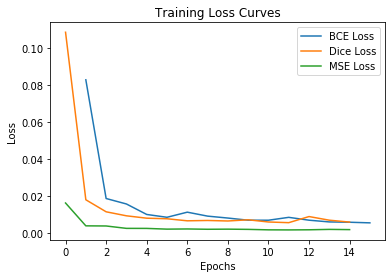

In [10]:
epochs = np.arange(1, 16)
plt.plot(epochs, bce_train_loss, label = "BCE Loss")
plt.plot(dice_train_loss, label = "Dice Loss")
plt.plot(mse_train_loss, label = "MSE Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curves")
plt.legend()

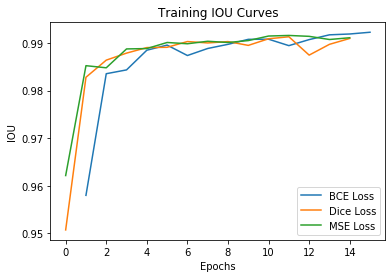

In [11]:
epochs = np.arange(1, 16)
plt.plot(epochs, bce_train_iou, label = "BCE Loss")
plt.plot(dice_train_iou, label = "Dice Loss")
plt.plot(mse_train_iou, label = "MSE Loss")
plt.xlabel("Epochs")
plt.ylabel("IOU")
plt.title("Training IOU Curves")
plt.legend()

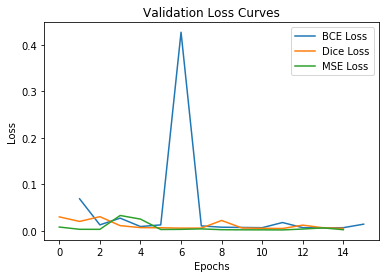

In [12]:
epochs = np.arange(1, 16)
plt.plot(epochs, bce_val_loss, label = "BCE Loss")
plt.plot(dice_val_loss, label = "Dice Loss")
plt.plot(mse_val_loss, label = "MSE Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Validation Loss Curves")
plt.legend()

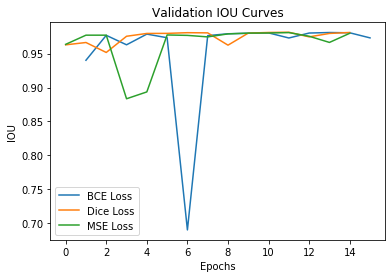

In [13]:
epochs = np.arange(1, 16)
plt.plot(epochs, bce_val_iou, label = "BCE Loss")
plt.plot(dice_val_iou, label = "Dice Loss")
plt.plot(mse_val_iou, label = "MSE Loss")
plt.xlabel("Epochs")
plt.ylabel("IOU")
plt.title("Validation IOU Curves")
plt.legend()

In [16]:
# Viewing some predictions
img = -1
mask = -1
for idx, (img_batch, mask_batch) in enumerate(test_loader):
    if idx == 0:
        img = img_batch
        mask = mask_batch
        break
pred_bce = unet_bce(img)
pred_dice = unet_dice(img)
pred_mse = unet_mse(img)

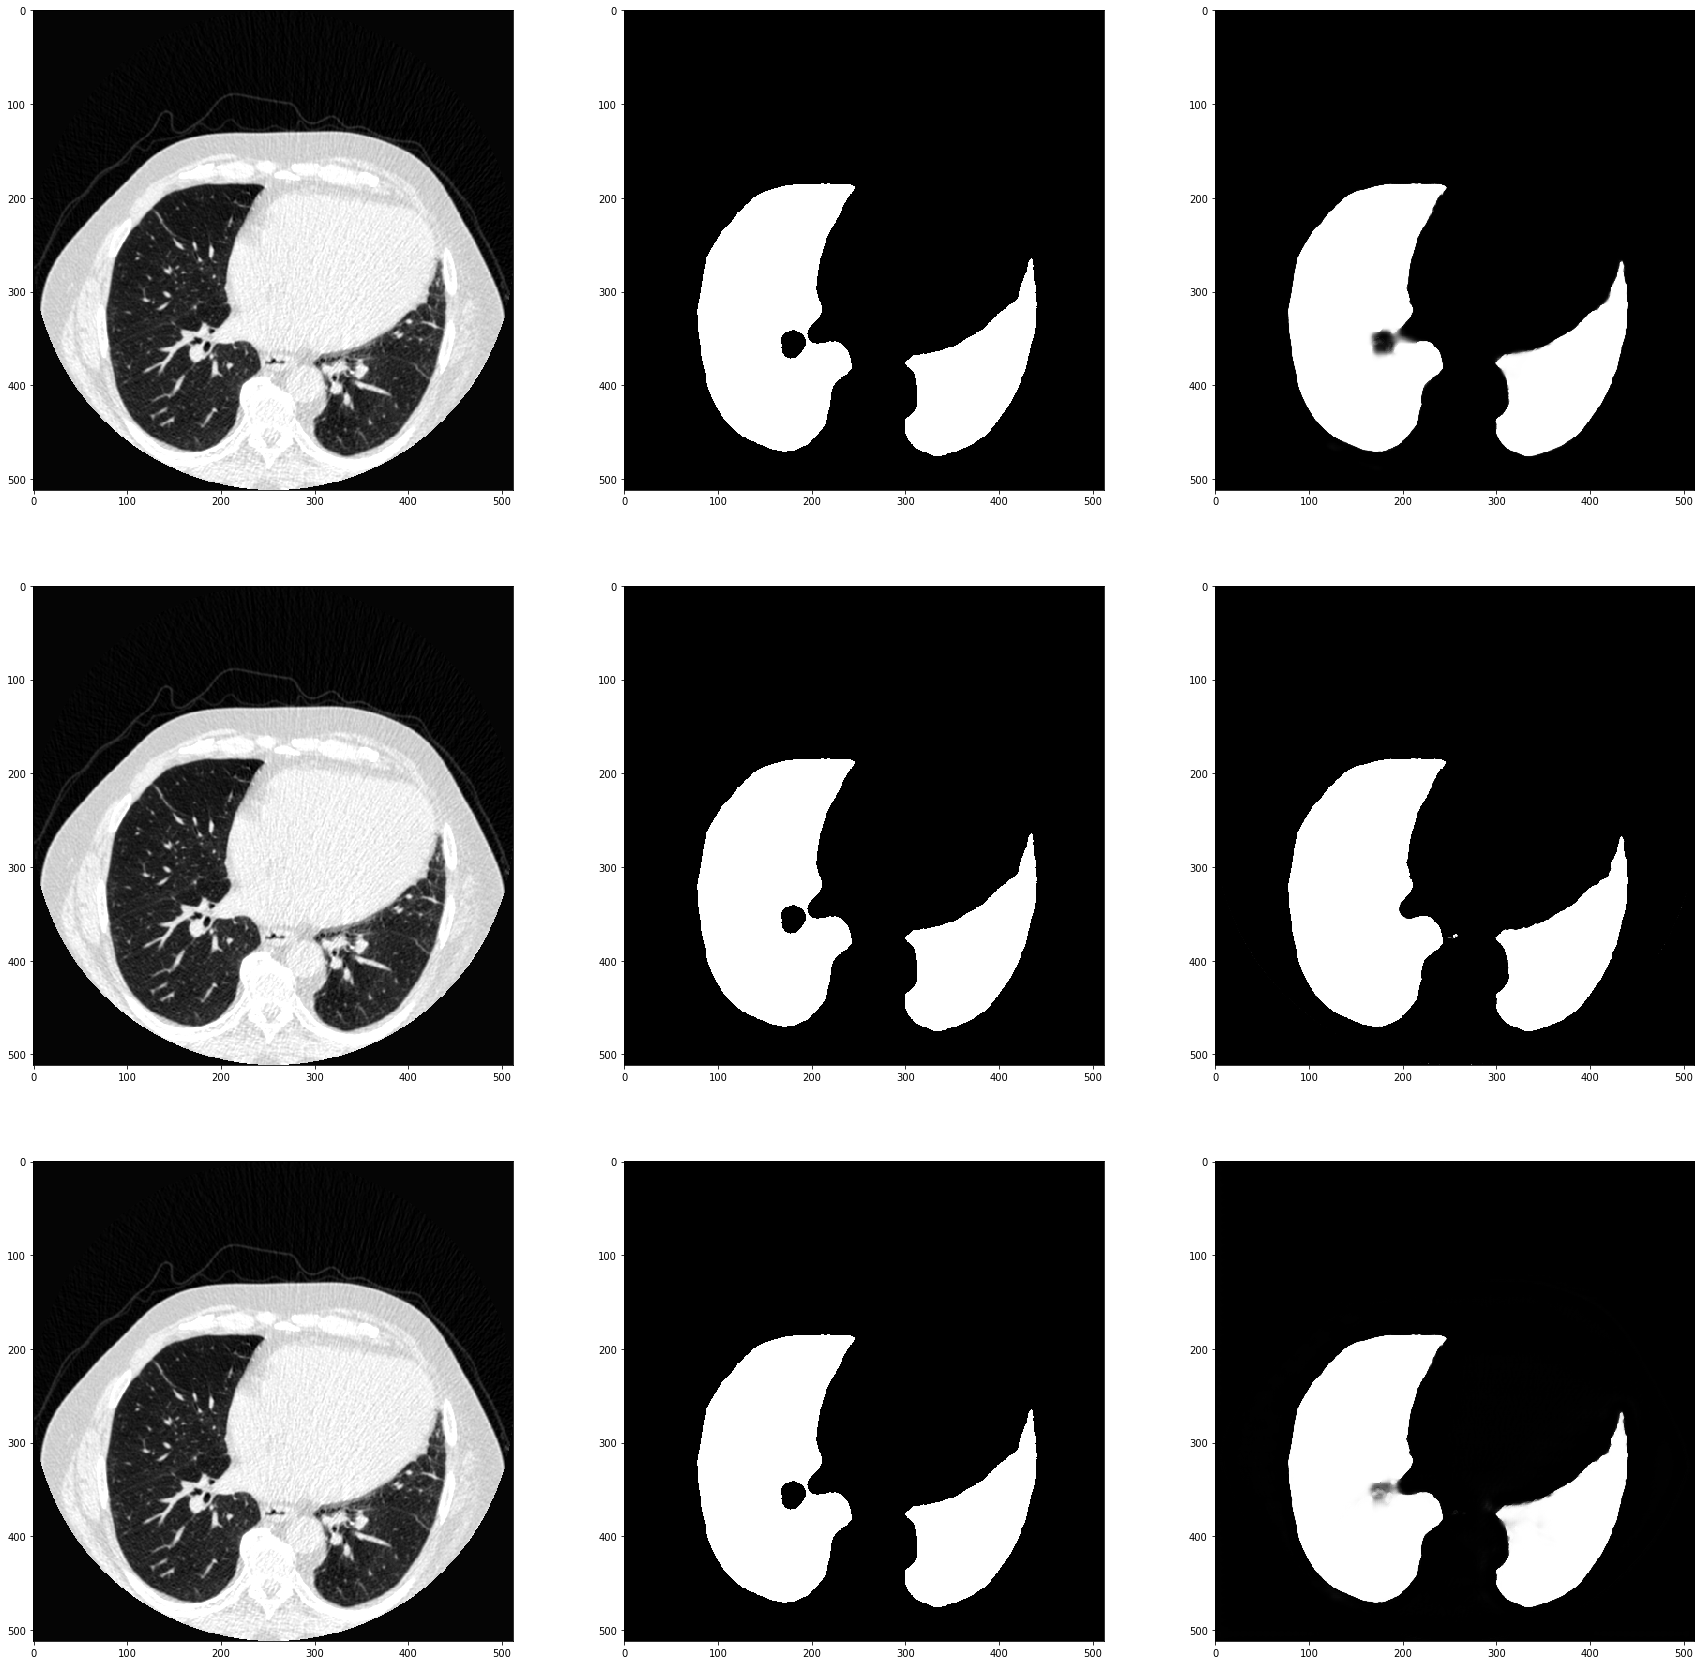

In [17]:
fig, ax = plt.subplots(3, 3, figsize = (30, 30))
ax[0, 0].imshow(img.view(512, 512), cmap = 'gray')
ax[1, 0].imshow(img.view(512, 512), cmap = 'gray')
ax[2, 0].imshow(img.view(512, 512), cmap = 'gray')
ax[0, 1].imshow(mask.view(512, 512), cmap = 'gray')
ax[1, 1].imshow(mask.view(512, 512), cmap = 'gray')
ax[2, 1].imshow(mask.view(512, 512), cmap = 'gray')
ax[0, 2].imshow(pred_bce.detach().view(512, 512), cmap = 'gray')
ax[1, 2].imshow(pred_dice.detach().view(512, 512), cmap = 'gray')
ax[2, 2].imshow(pred_mse.detach().view(512, 512), cmap = 'gray')